In [2]:
import pandas as pd

datos = pd.read_csv('./sales.csv')

datos.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
import sys

print(sys.executable)

c:\Users\gamma\AppData\Local\Programs\Python\Python310\python.exe


In [5]:
import numpy

In [4]:
# Convertimos la columna 'date' del DataFrame 'datos' a tipo datetime
# Esto es útil para trabajar con fechas y horas, ya que pandas proporciona muchas herramientas para manejar este tipo de datos
datos['date'] = pd.to_datetime(datos['date']).dt.floor('S')

# Establecemos la columna 'date' como el índice del DataFrame 'datos'
# Esto significa que en lugar de usar índices enteros por defecto (0, 1, 2, ...), usaremos las fechas como índices
# Esto facilita operaciones como ordenar por fecha, filtrar por rangos de fechas, y realizar análisis de series temporales
datos = datos.set_index('date')

In [5]:
datos

,sales
date,
2022-09-03 17:10:08,55.292157
2022-09-04 17:10:08,53.803211
2022-09-05 17:10:08,58.141693
2022-09-06 17:10:08,64.530899
2022-09-07 17:10:08,66.013633
...,...
2023-08-30 17:10:08,989.600354
2023-08-31 17:10:08,994.987326
2023-09-01 17:10:08,995.814415


In [6]:
# Seleccionamos una columna específica del DataFrame 'datos'
# En este caso, estamos seleccionando la columna 'sales'
# Esto crea una nueva Serie de pandas que contiene solo los datos de la columna 'sales'
datos_new = datos['sales']
datos_new.head()

date
2022-09-03 17:10:08    55.292157
2022-09-04 17:10:08    53.803211
2022-09-05 17:10:08    58.141693
2022-09-06 17:10:08    64.530899
2022-09-07 17:10:08    66.013633
Name: sales, dtype: float64

In [7]:
datos_new.isna().sum()

0

In [8]:
(datos_new.index.max()-datos_new.index.min()).days

365

Seguimos viendo date porque ahora es el indice:

Índice: La parte izquierda (date) muestra el índice de la Serie. En tu caso, debido a que previamente estableciste la columna 'date' como índice del DataFrame datos, este índice se ha mantenido en la Serie datos_new.

NameError: name 'datos_new' is not defined

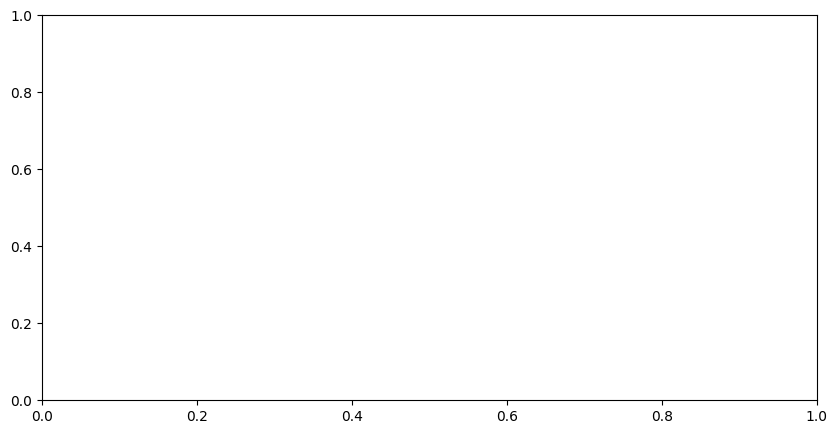

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = datos_new)

plt.tight_layout()

plt.show()

autolag='AIC': Este es probablemente el modo más comúnmente utilizado. AIC significa "Criterio de Información de Akaike". Cuando se establece autolag='AIC', la prueba de Dickey-Fuller Aumentada seleccionará automáticamente el número de retardos que minimiza el valor de AIC. El AIC es una medida que equilibra la complejidad del modelo (número de retardos) con qué tan bien el modelo se ajusta a los datos.

Otras opciones para autolag: Puedes encontrar otras opciones como 'BIC' (Criterio de Información Bayesiano) o 't-stat' (basado en la significancia estadística del último retardo). Cada uno de estos métodos tiene su propia forma de equilibrar la complejidad del modelo con el ajuste a los datos.

En resumen, autolag ayuda a determinar automáticamente cuántos valores pasados de la serie de tiempo deberían considerarse en la prueba de Dickey-Fuller Aumentada, basándose en criterios estadísticos que buscan un equilibrio entre un modelo más simple y un buen ajuste a los datos.

In [10]:
# Importamos una herramienta especial de una biblioteca llamada 'statsmodels'.
from statsmodels.tsa.stattools import adfuller

# Creamos una función llamada 'test_stationarity' que va a analizar una serie de datos en el tiempo.
def test_stationarity(timeseries):
    # Imprimimos un mensaje para decir que estamos empezando una prueba especial llamada Dickey-Fuller.
    print("Resultados de la prueba de Dickey-Fuller:")
    
    # Aquí realizamos la prueba Dickey-Fuller en nuestros datos.
    # Esta prueba nos ayuda a entender si los patrones en nuestros datos cambian con el tiempo o no.
    dftest = adfuller(timeseries, autolag = "AIC")
    
    # Ahora vamos a guardar los resultados de la prueba en un formato fácil de leer.
    # Estos resultados incluyen varios números que nos dicen cosas importantes sobre nuestros datos.
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    # También incluimos unos números adicionales llamados 'valores críticos'.
    # Estos nos ayudan a entender mejor los resultados de la prueba.
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    
    # Finalmente, la función devuelve todos estos resultados para que podamos verlos.
    return dfoutput

# Aquí usamos la función en una serie de tiempo llamada 'datos_new'.
test_stationarity(datos_new)


Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Test Statistic 0.545414
Este es el resultado principal de la prueba. Un número más negativo aquí generalmente significa que es más probable que la serie de tiempo sea estacionaria. En tu caso, el número es positivo, lo que sugiere que la serie de tiempo probablemente no es estacionaria.

p-value 0.986190
Este número te dice qué tan probable es que los resultados de la prueba se deban solo al azar. Un número bajo aquí (como menos de 0.05) indicaría que la serie de tiempo es estacionaria. Pero tu número es alto, lo que sugiere que la serie de tiempo no es estacionaria.

#Lags Used 13.000000
Esto indica cuántos datos anteriores (retardos) se usaron en la prueba. Los retardos son datos pasados que se utilizan para hacer predicciones sobre los datos actuales.

Number of Observations Used 352.000000
Este es el número total de puntos de datos que se usaron en la prueba, después de tener en cuenta los retardos.

Critical Value (1%) -3.449065
Este es un valor de referencia para comparar con el estadístico de prueba. Si tu estadístico de prueba es menor que este número, podrías decir con un 99% de confianza que tu serie de tiempo es estacionaria. En tu caso, el estadístico de prueba no es menor que este número.

Critical Value (5%) -2.869786
Similar al valor crítico del 1%, pero para un 95% de confianza. Si tu estadístico de prueba es menor que este número, podrías decir con un 95% de confianza que tu serie de tiempo es estacionaria. De nuevo, en tu caso, no lo es.

Critical Value (10%) -2.571163
Este es otro valor de referencia, pero para un 90% de confianza. Si tu estadístico de prueba es menor que este número, podrías decir con un 90% de confianza que tu serie de tiempo es estacionaria. Tu estadístico de prueba tampoco es menor que este número.

In [11]:
# Importamos la función 'seasonal_decompose' de la biblioteca 'statsmodels'.
# Esta función se utiliza para descomponer una serie de tiempo en sus componentes.
from statsmodels.tsa.seasonal import seasonal_decompose

# Utilizamos 'seasonal_decompose' en nuestros datos ('datos_new').
# Esto descompone la serie de tiempo en tres componentes: tendencia, estacionalidad y residuo.
decomposition = seasonal_decompose(datos_new)

# Al imprimir 'decomposition', podemos ver los resultados de esta descomposición.
# Estos resultados incluyen:
# - Tendencia: Muestra el patrón general o la dirección de los datos a lo largo del tiempo.
# - Estacionalidad: Muestra patrones o ciclos que se repiten a intervalos regulares.
# - Residuo: Muestra la parte de los datos que no se explica por la tendencia o la estacionalidad.
decomposition


date
2022-09-03 17:10:08           NaN
2022-09-04 17:10:08           NaN
2022-09-05 17:10:08           NaN
2022-09-06 17:10:08     60.904309
2022-09-07 17:10:08     62.686159
                          ...    
2023-08-30 17:10:08    990.488639
2023-08-31 17:10:08    993.365915
2023-09-01 17:10:08           NaN
2023-09-02 17:10:08           NaN
2023-09-03 17:10:08           NaN
Name: trend, Length: 366, dtype: float64
date
2022-09-03 17:10:08    0.637205
2022-09-04 17:10:08    0.685388
2022-09-05 17:10:08    0.551760
2022-09-06 17:10:08    0.132276
2022-09-07 17:10:08   -0.197866
                         ...   
2023-08-30 17:10:08   -0.197866
2023-08-31 17:10:08   -0.492453
2023-09-01 17:10:08   -1.316310
2023-09-02 17:10:08    0.637205
2023-09-03 17:10:08    0.685388
Name: seasonal, Length: 366, dtype: float64
date
2022-09-03 17:10:08         NaN
2022-09-04 17:10:08         NaN
2022-09-05 17:10:08         NaN
2022-09-06 17:10:08    3.494314
2022-09-07 17:10:08    3.525340
              

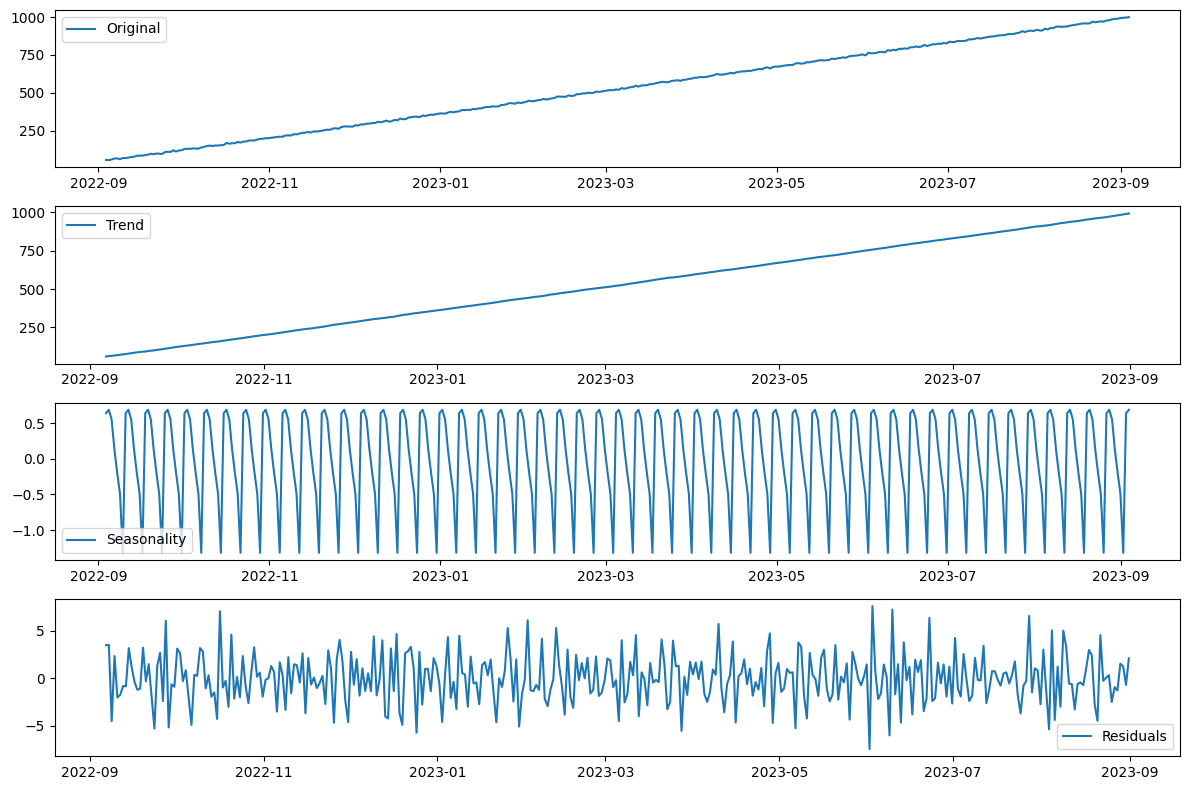

In [12]:
# Acceder a la tendencia
trend = decomposition.trend

# Acceder a la estacionalidad
seasonal = decomposition.seasonal

# Acceder al residuo
resid = decomposition.resid

# Ahora puedes imprimir cada uno de estos componentes o graficarlos para un análisis más detallado.
# Por ejemplo, para imprimir la tendencia:
print(trend)
print(seasonal)
print(resid)

# O para graficar cada componente:

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(datos_new, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

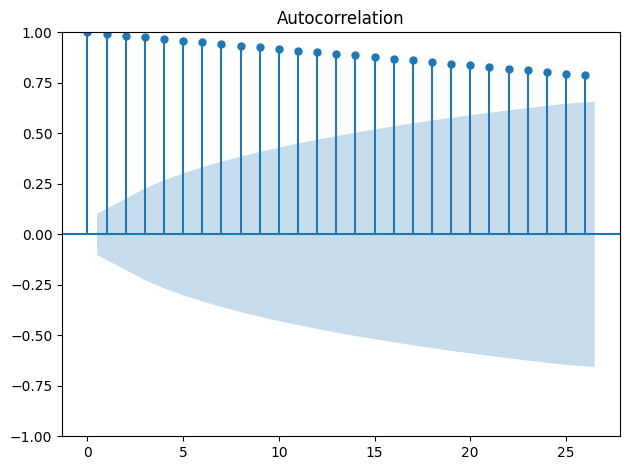

In [13]:
# Primero, necesitamos una herramienta especial para hacer un tipo de gráfico. 
# Esta herramienta se llama 'plot_acf' y viene de una biblioteca llamada 'statsmodels'.
from statsmodels.graphics.tsaplots import plot_acf

# Ahora, vamos a usar esta herramienta para hacer un gráfico especial de nuestros datos.
# Este gráfico se llama 'Autocorrelation Function' (Función de Autocorrelación), o ACF.
# Nos ayuda a ver cómo cada punto de datos en nuestra serie de tiempo se relaciona con los puntos anteriores.
plot_acf(datos_new)

# 'plt.tight_layout()' hace que nuestro gráfico se vea más ordenado y bonito.
# 'plt' es otra herramienta que usamos para hacer y mejorar gráficos.
plt.tight_layout()

# Finalmente, con 'plt.show()' mostramos el gráfico en la pantalla para que podamos verlo.
plt.show()


En el gráfico, el eje horizontal (x) muestra el número de rezagos (lags), mientras que el eje vertical (y) muestra los valores de autocorrelación para cada rezago, que pueden variar de -1 a 1. Los puntos representan el coeficiente de autocorrelación para cada rezago individual:

Un valor de 1 indica una correlación positiva perfecta; es decir, la serie se mueve en la misma dirección en el tiempo.
Un valor de -1 indica una correlación negativa perfecta; es decir, la serie se mueve en direcciones opuestas en el tiempo.
Un valor de 0 indica que no hay correlación.
La sombra azul alrededor de los puntos muestra los intervalos de confianza, que típicamente se establecen en 95%. Si la línea del coeficiente de autocorrelación está fuera de esta sombra, se puede considerar que hay una autocorrelación estadísticamente significativa en ese rezago específico.

En este gráfico específico, la autocorrelación disminuye a medida que aumenta el número de rezagos, pero se mantiene positiva y parece ser significativa (fuera de la sombra azul) para todos los rezagos mostrados. Esto podría indicar un proceso persistente, donde los valores pasados tienen una influencia fuerte y positiva sobre los valores futuros. Este patrón es común en series temporales que exhiben tendencias o efectos estacionales.

In [14]:
datos_new.values

array([  55.29215704,   53.80321135,   58.1416934 ,   64.53089878,
         66.01363287,   60.08186499,   68.46670361,   67.76510646,
         70.51226125,   74.65645304,   76.45952797,   82.99295751,
         83.51598989,   84.20064149,   87.76994586,   90.04211887,
         96.12607284,   93.63110055,   97.78851817,   96.88976758,
         94.39582507,  106.61839003,  109.85358257,  107.63651864,
        119.2750173 ,  110.70539613,  117.80850843,  119.71242105,
        127.47504997,  129.88752836,  128.54703406,  131.81941907,
        130.62431399,  129.94802155,  137.44941424,  141.56493732,
        147.38950218,  149.90850941,  147.74212914,  150.59994106,
        150.96393015,  152.45227496,  154.19625792,  167.7701344 ,
        162.9915914 ,  165.80906477,  165.96764132,  174.66123819,
        170.08981331,  176.89602573,  177.45058662,  183.90043352,
        183.81005034,  184.40330893,  190.46339852,  194.43568054,
        195.95297632,  199.26358008,  199.05593783,  202.47342

In [15]:
from prophet import Prophet

# Ajustamos un modelo de Prophet con el dataframe creado para la serie temporal
model = Prophet().fit(pd.DataFrame({'ds': datos_new.index, 'y': datos_new.values}))

# Creamos un df que contendrá las predicciones
df_future = model.make_future_dataframe(periods=len(datos_new), freq='d')
# Realizamos la predicción
forecast = model.predict(df_future)

21:44:39 - cmdstanpy - INFO - Chain [1] start processing
21:44:39 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-03 17:10:08,52.322748,49.430873,56.696881,52.322748,52.322748,0.653215,0.653215,0.653215,0.653215,0.653215,0.653215,0.0,0.0,0.0,52.975964
1,2022-09-04 17:10:08,54.844798,51.929920,59.046592,54.844798,54.844798,0.626446,0.626446,0.626446,0.626446,0.626446,0.626446,0.0,0.0,0.0,55.471244
2,2022-09-05 17:10:08,57.366848,54.391931,61.614057,57.366848,57.366848,0.541350,0.541350,0.541350,0.541350,0.541350,0.541350,0.0,0.0,0.0,57.908199
3,2022-09-06 17:10:08,59.888898,56.516808,63.447703,59.888898,59.888898,0.139929,0.139929,0.139929,0.139929,0.139929,0.139929,0.0,0.0,0.0,60.028827
4,2022-09-07 17:10:08,62.410948,58.791437,65.761240,62.410948,62.410948,-0.195616,-0.195616,-0.195616,-0.195616,-0.195616,-0.195616,0.0,0.0,0.0,62.215332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2024-08-30 17:10:08,1937.272713,1899.026909,1971.302103,1900.814828,1972.479841,-1.281555,-1.281555,-1.281555,-1.281555,-1.281555,-1.281555,0.0,0.0,0.0,1935.991158
728,2024-08-31 17:10:08,1939.863932,1903.285643,1976.250126,1903.237382,1975.185669,0.653215,0.653215,0.653215,0.653215,0.653215,0.653215,0.0,0.0,0.0,1940.517147
729,2024-09-01 17:10:08,1942.455151,1905.725479,1978.106170,1905.551678,1977.889253,0.626446,0.626446,0.626446,0.626446,0.626446,0.626446,0.0,0.0,0.0,1943.081597
730,2024-09-02 17:10:08,1945.046370,1907.733376,1981.169444,1907.863375,1980.576484,0.541350,0.541350,0.541350,0.541350,0.541350,0.541350,0.0,0.0,0.0,1945.587720


In [17]:
forecast.yhat

0        52.975964
1        55.471244
2        57.908199
3        60.028827
4        62.215332
          ...     
727    1935.991158
728    1940.517147
729    1943.081597
730    1945.587720
731    1947.777518
Name: yhat, Length: 732, dtype: float64

In [18]:
# Esta línea obtiene todas las herramientas especiales de una caja de herramientas para medir qué tan bien hacemos algo.
from sklearn.metrics import *

# Aquí estamos preparando una lista de adivinanzas (predicciones) que nuestra máquina de adivinar (modelo) ha hecho.
# Solo tomamos las últimas adivinanzas que coinciden con el número de cosas nuevas que queremos adivinar.
yhat_test_pro = forecast.yhat[-len(datos_new):]

# Ahora, vamos a usar tres herramientas diferentes para ver qué tan buenas son nuestras adivinanzas.

# La primera herramienta nos dice si nuestras adivinanzas siguen la misma tendencia que las cosas reales.
# Un número cercano a 1 significa muy parecido, y un número negativo significa no muy parecido.
print(r2_score(datos_new, yhat_test_pro),  # Esta es la herramienta que mide la tendencia.

# La segunda herramienta nos dice, en promedio, qué tan grande es el error de nuestras adivinanzas en porcentaje.
# Por ejemplo, si adivinamos 100 y la respuesta correcta era 200, entonces nuestro error es del 100%.
      mean_absolute_percentage_error(datos_new, yhat_test_pro) * 100,  # Esta herramienta mide el error en porcentaje.

# La tercera herramienta nos dice, en promedio, cuánto nos equivocamos en nuestras adivinanzas sin importar si fue por arriba o por abajo.
# Si adivinamos 90 o 110 y la respuesta correcta era 100, nuestro error es 10.
      mean_absolute_error(datos_new, yhat_test_pro))  # Esta herramienta mide el error promedio.


-10.95332418938758 299.7610419179624 949.7780399138192


El resultado que obtienes después de ejecutar el código son números que te dicen cómo se comportaron tus adivinanzas:

-10.95332418938758: Este número es como el puntaje de un juego, pero aquí, si tienes un número negativo, significa que tus adivinanzas no fueron parecidas a las respuestas reales en absoluto. Si fuera cercano a 1, sería como ganar el juego, indicando que tus adivinanzas fueron muy similares a la realidad.

299.7610419179624: Este porcentaje te dice que, en promedio, tus adivinanzas fueron casi 300% diferentes de las respuestas reales. Eso es como si dijeras que algo que cuesta 1 dólar cuesta 3 dólares, así que es un error bastante grande.

949.7780399138192: Este número te dice que en promedio te equivocaste por 949.77 (cualquiera que sea la unidad de medida) en tus adivinanzas. Si estuvieras adivinando pesos y dijiste que algo pesaba 1000 gramos cuando en realidad pesaba 50 gramos, tu error sería de 950 gramos, lo cual es un error grande.

In [34]:
# Graficar el forecast
model.plot(forecast[7])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Forecast con Prophet')
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot'

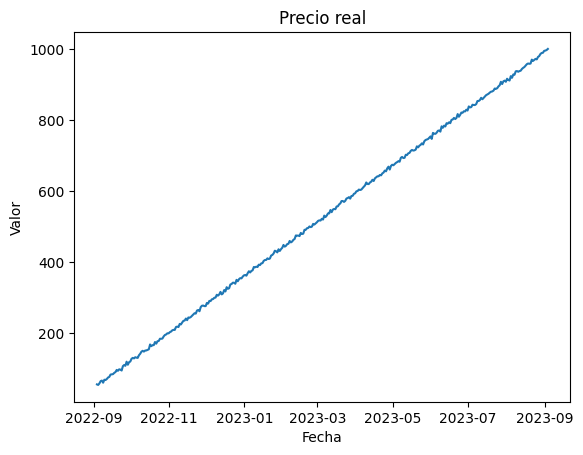

In [20]:
plt.plot(datos_new)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Precio real')
plt.show()

In [21]:
datos_new

date
2022-09-03 17:10:08      55.292157
2022-09-04 17:10:08      53.803211
2022-09-05 17:10:08      58.141693
2022-09-06 17:10:08      64.530899
2022-09-07 17:10:08      66.013633
                          ...     
2023-08-30 17:10:08     989.600354
2023-08-31 17:10:08     994.987326
2023-09-01 17:10:08     995.814415
2023-09-02 17:10:08     997.350214
2023-09-03 17:10:08    1000.482785
Name: sales, Length: 366, dtype: float64

In [22]:
datos.shape

(366, 1)

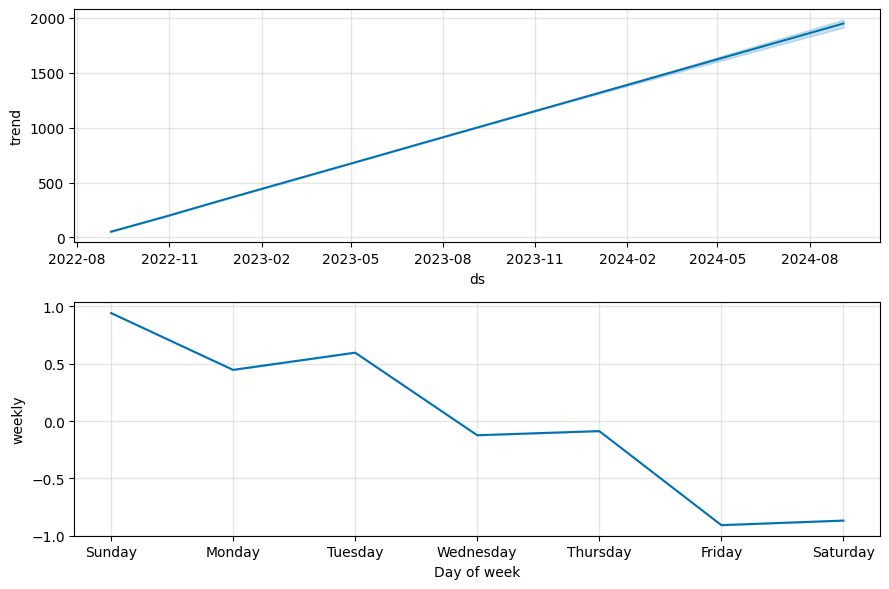

In [23]:
# Descomponer la serie y visualizar las componentes
model.plot_components(forecast)
plt.show()

Gráfico Superior: Tendencia
Eje X (ds): Representa la fecha o el tiempo. Va desde agosto de 2022 hasta aproximadamente agosto de 2024.
Eje Y (trend): Representa el valor de la tendencia en la serie temporal. En este caso, parece ser una cantidad o una métrica que aumenta con el tiempo.
Línea Azul: Muestra cómo la tendencia de los datos cambia con el tiempo. Aquí se ve una tendencia claramente ascendente, lo que significa que el valor que se está midiendo está aumentando a lo largo del periodo considerado.

Gráfico Inferior: Estacionalidad Semanal
Eje X: Representa los días de la semana, de domingo a sábado.
Eje Y (weekly): Representa la magnitud de la estacionalidad semanal, es decir, cómo varía el valor que se está midiendo en diferentes días de la semana.
Línea Azul: Muestra cómo el valor cambia en promedio durante la semana. En este caso, parece que hay un pico al principio de la semana (domingo y lunes), una caída en los días intermedios, y luego una caída más pronunciada hacia el final de la semana (viernes y sábado)

day_of_week
Monday       520.309110
Tuesday      522.501197
Wednesday    524.759127
Thursday     527.065308
Friday       528.863410
Saturday     524.328929
Sunday       526.895757
Name: sales, dtype: float64


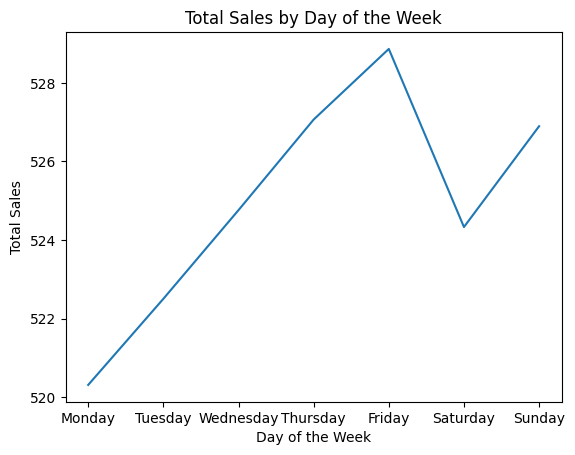

In [24]:
# Crear un DataFrame de ejemplo (aquí deberías cargar tus datos reales).
# datos = pd.read_csv('tu_archivo.csv') # Descomenta y usa esta línea si tus datos están en un archivo CSV.
# Asegúrate de que la columna 'date' está en formato datetime.
# datos['date'] = pd.to_datetime(datos['date']) # Descomenta si necesitas convertir la columna 'date' a datetime.

# Suponiendo que datos es tu DataFrame y ya tiene una columna de fecha y hora en formato datetime.
# Añade una columna para el día de la semana.
datos['day_of_week'] = datos.index.day_name()

# Agrupa por día de la semana y suma las ventas.
sales_by_day_of_week = datos.groupby('day_of_week')['sales'].mean()

# Ordena los resultados por el día de la semana.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week = sales_by_day_of_week.reindex(days_order)

# Imprime los resultados.
print(sales_by_day_of_week)

# Visualiza los resultados en un gráfico de barras.
sales_by_day_of_week.plot(kind='line')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

In [25]:
from pmdarima import auto_arima

model = auto_arima(datos_new, seasonal = False, trace = True, m = 7)

c:\Users\gamma\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.229, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.283 seconds


In [26]:
forecast = model.predict(20)
forecast

2023-09-04 17:10:08    1002.158148
2023-09-05 17:10:08    1004.831668
2023-09-06 17:10:08    1007.423289
2023-09-07 17:10:08    1010.021630
2023-09-08 17:10:08    1012.619419
2023-09-09 17:10:08    1015.217253
2023-09-10 17:10:08    1017.815084
2023-09-11 17:10:08    1020.412915
2023-09-12 17:10:08    1023.010746
2023-09-13 17:10:08    1025.608577
2023-09-14 17:10:08    1028.206408
2023-09-15 17:10:08    1030.804239
2023-09-16 17:10:08    1033.402070
2023-09-17 17:10:08    1035.999902
2023-09-18 17:10:08    1038.597733
2023-09-19 17:10:08    1041.195564
2023-09-20 17:10:08    1043.793395
2023-09-21 17:10:08    1046.391226
2023-09-22 17:10:08    1048.989057
2023-09-23 17:10:08    1051.586888
Freq: D, dtype: float64

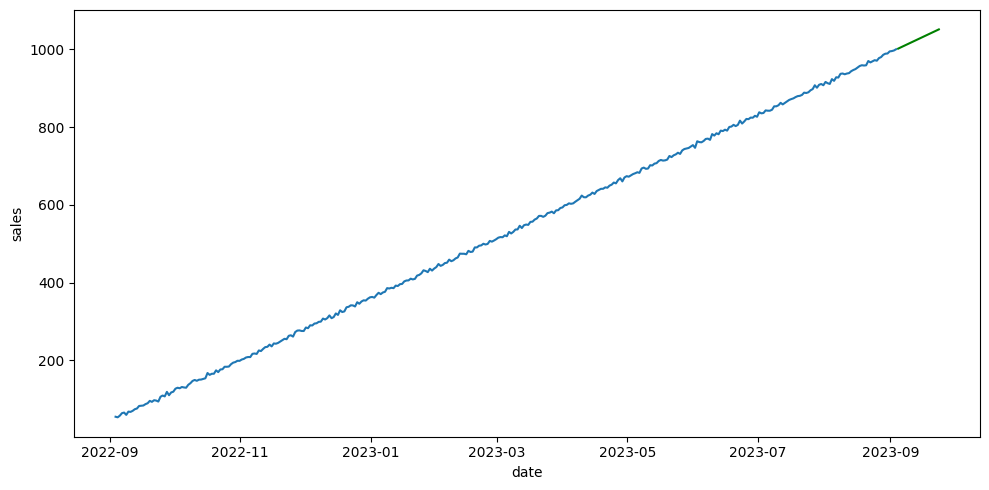

In [27]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = datos_new)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()